# Review - ODEs and Stats

Week 6 is about combining our methods for solving ODEs with random variables and Monte Carlo to examine solutions to stochastic differential equations. We begin by reviewing a few key concepts from Weeks 4 and 5 that we will need again this week. 


In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

---

## Part1: Euler's method

When we studied ODEs we used Euler's method only for illustration. For our "real" solutions we used SciPy `Odeint`. However, for our stochastic differential equations we will use Euler's method. Hence it is important that the Python coding be clear.

We consider systems of ODEs

$$
\dot y = \frac{dy}{dt} = f(y,t), \label{eq:ODE1}\tag{1}
$$

We let $y_n$ denote our numerical approximation to the true solution $y(t_n)$ on a time grid, $t_0, t_1, \cdots, t_n \cdots t_N$. The time grid has $N+1$ points.


*Euler time stepping* is given by

$$
y_{n+1} = y_n + \Delta t  f(y_n, t_n) 
$$

We assume that we are told the initial condition. Hence we know $y_0$. We simply repeatedly apply the Euler time stepping to find the approximate solution $y_n$ at later times. 

---

We considered a Python code for solving the linear, one-variable ODE 

$$
\dot y = -\mu y
$$

The code from week 4 is repeated here with some changes in the parameters. While it is simple, we are going to generalise it to SDEs, so it is worth being sure you understand everything here. Note in particular that the solution array is of length `Nsteps+1` for the `Nsteps+1` values on our time grid. 

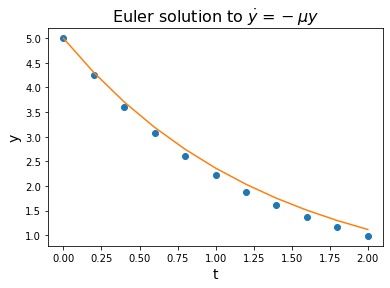

In [2]:
# Solve the ODE: dot y = -mu y, by Euler time stepping,
# and plot the numerical and true solutions.

# Problem setup. 
# Set model and numerical parameters, and the initial condition.
# These are the lines the user might want to vary.
tf = 2
Nsteps = 10
mu = 0.75
y0 = 5

# Generate the time grid and solution array
t, dt = np.linspace(0, tf, Nsteps+1, retstep=True)
y = np.zeros(Nsteps+1)

# Set the first point in the solution array to the initial condition
y[0] = y0
    
# Euler time-stepping loop:
for n in range(Nsteps):
    ydot = -mu * y[n]
    y[n+1] = y[n] + dt * ydot
        
# plot the numerical solution
plt.plot(t, y, 'o')

# plot the true solution
y_true = y0*np.exp(-mu*t)
plt.plot(t, y_true)

# labels etc
plt.xlabel("t", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("Euler solution to $\dot y = -\mu y$", fontsize=16)

plt.show()

**Exercise:** Verify that as you make `Nsteps` larger and larger, that is `dt` smaller and smaller, the solution gets better and better. You can do this graphically, and also by printing the numerical solution at the final time together with the exact solution.

---

## Part II: Systems of ODEs

We then considered the generalisation to systems of ODEs. The important point here is our solution array `y_sol` is then a 2D array. The first dimension corresponds to time and the second dimension corresponds to the number of equations. 

Below is a simple Python code cell that time steps the trivial system of ODEs $\dot y = y$ where $y$. The number of equations is specified by the initial condition. 

The important part to understand is the time-stepping loop where all the equations are updated simultaneously using slicing. We are going to use a very similar construction this week.

In [3]:
# Euler time-stepping of the systems of ODEs: dot y = y.

# Set problem parameters
Nsteps = 5
tf = 1
y0 = np.array([2, 4])

# Compute number of dependent variables from y0
Neqs = len(y0)

# Allocate t and y arrays
t, dt = np.linspace(0, tf, Nsteps+1, retstep=True)
y_sol = np.zeros((Nsteps+1, Neqs))

# Initialise the solution array
y_sol[0,:] = y0[:]

# Euler time-stepping loop (for the identity function f(t,y) = y)
for n in range(Nsteps):
    ydot = y_sol[n,:]
    y_sol[n+1,:] = y_sol[n,:] + dt * ydot

# print the final solution
print(y_sol)

[[2.      4.     ]
 [2.4     4.8    ]
 [2.88    5.76   ]
 [3.456   6.912  ]
 [4.1472  8.2944 ]
 [4.97664 9.95328]]


**Exercise:** Add a third value to the initial condition array `y0`. Maybe pick a negative one for variety. Rerun the cell. If you feel energetic, try other initial conditions and `Nsteps`, and observe the corresponding shape of the output. 

To summarise: 

- In the 2D solution array `y_sol`, rows correspond to different times and columns correspond to different components of the solution. 


---

## Part III: Normally distributed random numbers

To generate an array of `N` random numbers from the standard normal distribution we use
```
X = np.random.randn(N)
```

If we want the mean and standard deviation of an array for values we use
```
np.mean(X)
np.std(X)
```

For example

In [4]:
# 
N = 1000
X = np.random.randn(N)
print("the mean of X is", np.mean(X))

# subtract 2 from all values of X
X -= 2
print("the mean of X is now", np.mean(X))

print("the standard deviation of X is", np.std(X))


the mean of X is -0.06722456957587382
the mean of X is now -2.067224569575874
the standard deviation of X is 0.9813918218803063


---

We need to plot the normal (Gaussian) distribution. We use the scipy.stats and first import `norm`

In [5]:
from scipy.stats import norm

To plot the standard normal distribution we use

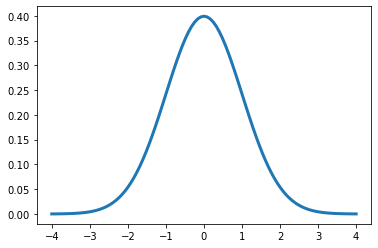

In [6]:
# plot the standard normal distribution from -4 to 4 with line weight 3

x = np.linspace(-4, 4, 101)
y = norm.pdf(x)
plt.plot(x, y, lw=3)
plt.show()

We can plot normal distributions with other means (locations) and other standard deviations (scales). 
The general form of the function `norm.pdf` is

```
norm.pdf(x, loc, scale)
```

where 
- `loc` is the same as mean and has default value 0.
- `scale` is the same as standard deviation and has default value 1.

**Exercise:** Plot the normal distribution with mean -2 and standard deviation 2.

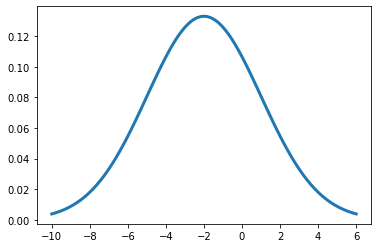

In [7]:
# plot normal distribution with mean -2 and std 3
x = np.linspace(-10,6,101)
y = norm.pdf(x, -2, 3)
plt.plot(x, y, lw=3)
plt.show()